In [53]:
import pandas as pd 
import os

# merging files for 12 months 




In [54]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()
    
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv", index=False)

In [55]:
all_data = pd.read_csv('all_data.csv', header=0)
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

# clean up the data 

Drop rows of NaN

In [56]:
# find NaN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data = all_data.dropna().reset_index(drop=True)
all_data.head()

Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1   176559  Bose SoundSport Headphones                1      99.99   
2   176560                Google Phone                1        600   
3   176560            Wired Headphones                1      11.99   
4   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

## get rid of text in order date column 

In [57]:
all_data = all_data[all_data['Order Date'].str[0:2]!='or']

In [58]:
all_data

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1        176559  Bose SoundSport Headphones                1      99.99   
2        176560                Google Phone                1        600   
3        176560            Wired Headphones                1      11.99   
4        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186300   259353      AAA Batteries (4-pack)                3       2.99   
186301   259354                      iPhone                1        700   
186302   259355                      iPhone                1        700   
186303   259356      34in Ultrawide Monitor                1     379.99   
186304   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001  
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215  
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001  
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001  
...                ...                                      ...  
186300  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
186301  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016  
186302  09/23/19 07:39     220 12th St, San Francisco, CA 94016  
186303  09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
186304  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[186305 rows x 6 columns]

## make columns correct type

In [59]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')


# # augmented data with additional columns

### ADD MONTH COLUMN

In [60]:
print(all_data['Order Date'].unique())


['04/19/19 08:46' '04/07/19 22:30' '04/12/19 14:38' ... '09/23/19 07:39'
 '09/19/19 17:30' '09/30/19 00:18']


In [61]:
all_data = all_data[all_data['Order Date'].str[0:2].str.isnumeric()]


In [62]:
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')

all_data.head()

C:\Users\ANILKU~1\AppData\Local\Temp/ipykernel_2284/749256851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')


Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
1   176559  Bose SoundSport Headphones               1.0       99.99   
2   176560                Google Phone               1.0      600.00   
3   176560            Wired Headphones               1.0       11.99   
4   176561            Wired Headphones               1.0       11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

## add sales column

In [63]:
all_data["Sales"] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

C:\Users\ANILKU~1\AppData\Local\Temp/ipykernel_2284/1918810450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Sales"] = all_data['Quantity Ordered'] * all_data['Price Each']


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable               2.0       11.95   
1        176559  Bose SoundSport Headphones               1.0       99.99   
2        176560                Google Phone               1.0      600.00   
3        176560            Wired Headphones               1.0       11.99   
4        176561            Wired Headphones               1.0       11.99   
...         ...                         ...               ...         ...   
186300   259353      AAA Batteries (4-pack)               3.0        2.99   
186301   259354                      iPhone               1.0      700.00   
186302   259355                      iPhone               1.0      700.00   
186303   259356      34in Ultrawide Monitor               1.0      379.99   
186304   259357        USB-C Charging Cable               1.0       11.95   

            Order Date                         Purchase Address  Month   Sales  
0       04/19/19 08:46             917 1st St, Dallas, TX 75001      4   23.90  
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215      4   99.99  
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4  600.00  
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   11.99  
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4   11.99  
...                ...                                      ...    ...     ...  
186300  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9    8.97  
186301  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016      9  700.00  
186302  09/23/19 07:39     220 12th St, San Francisco, CA 94016      9  700.00  
186303  09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9  379.99  
186304  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9   11.95  

[185950 rows x 8 columns]

### add city column 

In [64]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data
    

C:\Users\ANILKU~1\AppData\Local\Temp/ipykernel_2284/3342874944.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable               2.0       11.95   
1        176559  Bose SoundSport Headphones               1.0       99.99   
2        176560                Google Phone               1.0      600.00   
3        176560            Wired Headphones               1.0       11.99   
4        176561            Wired Headphones               1.0       11.99   
...         ...                         ...               ...         ...   
186300   259353      AAA Batteries (4-pack)               3.0        2.99   
186301   259354                      iPhone               1.0      700.00   
186302   259355                      iPhone               1.0      700.00   
186303   259356      34in Ultrawide Monitor               1.0      379.99   
186304   259357        USB-C Charging Cable               1.0       11.95   

            Order Date                         Purchase Address  Month  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001      4   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215      4   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4   
...                ...                                      ...    ...   
186300  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9   
186301  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016      9   
186302  09/23/19 07:39     220 12th St, San Francisco, CA 94016      9   
186303  09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9   
186304  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9   

         Sales                 City  
0        23.90          Dallas (TX)  
1        99.99          Boston (MA)  
2       600.00     Los Angeles (CA)  
3        11.99     Los Angeles (CA)  
4        11.99     Los Angeles (CA)  
...        ...                  ...  
186300    8.97     Los Angeles (CA)  
186301  700.00   San Francisco (CA)  
186302  700.00   San Francisco (CA)  
186303  379.99   San Francisco (CA)  
186304   11.95   San Francisco (CA)  

[185950 rows x 9 columns]

# Question 1: What was the best month for sales? How much was earned that month?

In [65]:
results = all_data.groupby('Month').sum()
results

Quantity Ordered  Price Each       Sales
Month                                          
1               10903.0  1811768.38  1822256.73
2               13449.0  2188884.72  2202022.42
3               17005.0  2791207.83  2807100.38
4               20558.0  3367671.02  3390670.24
5               18667.0  3135125.13  3152606.75
6               15253.0  2562025.61  2577802.26
7               16072.0  2632539.56  2647775.76
8               13448.0  2230345.42  2244467.88
9               13109.0  2084992.09  2097560.13
10              22703.0  3715554.83  3736726.88
11              19798.0  3180600.68  3199603.20
12              28114.0  4588415.41  4613443.34

range(1, 13)


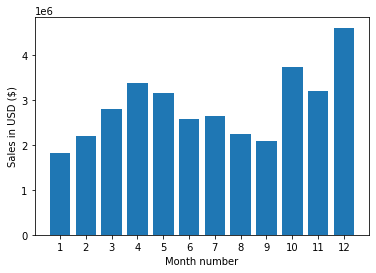

In [77]:
 import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()




### what city had highest number of sales?

In [78]:
results = all_data.groupby('City').sum()
results

Quantity Ordered  Price Each   Month       Sales    Hour  \
City                                                                            
 Atlanta (GA)                 16602.0  2779908.20  104794  2795498.58  214264   
 Austin (TX)                  11153.0  1809873.61   69829  1819581.75  141946   
 Boston (MA)                  22528.0  3637409.77  141112  3661642.01  288225   
 Dallas (TX)                  16730.0  2752627.82  104620  2767975.40  214390   
 Los Angeles (CA)             33289.0  5421435.23  208325  5452570.80  427444   
 New York City (NY)           27932.0  4635370.83  175741  4664317.43  357696   
 Portland (ME)                 2750.0   447189.25   17144   449758.27   35211   
 Portland (OR)                11303.0  1860558.22   70621  1870732.34  144421   
 San Francisco (CA)           50239.0  8211461.74  315520  8262203.91  643265   
 Seattle (WA)                 16553.0  2733296.01  104941  2747755.48  213292   

                      Minute  
City                          
 Atlanta (GA)         442932  
 Austin (TX)          289060  
 Boston (MA)          590442  
 Dallas (TX)          435155  
 Los Angeles (CA)     866638  
 New York City (NY)   733598  
 Portland (ME)         72856  
 Portland (OR)        295533  
 San Francisco (CA)  1319477  
 Seattle (WA)         436368

### what time should we display advertisement to maximize likelihood of customer's buying product?

In [68]:
all_data

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable               2.0       11.95   
1        176559  Bose SoundSport Headphones               1.0       99.99   
2        176560                Google Phone               1.0      600.00   
3        176560            Wired Headphones               1.0       11.99   
4        176561            Wired Headphones               1.0       11.99   
...         ...                         ...               ...         ...   
186300   259353      AAA Batteries (4-pack)               3.0        2.99   
186301   259354                      iPhone               1.0      700.00   
186302   259355                      iPhone               1.0      700.00   
186303   259356      34in Ultrawide Monitor               1.0      379.99   
186304   259357        USB-C Charging Cable               1.0       11.95   

            Order Date                         Purchase Address  Month  \
0       04/19/19 08:46             917 1st St, Dallas, TX 75001      4   
1       04/07/19 22:30        682 Chestnut St, Boston, MA 02215      4   
2       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
3       04/12/19 14:38     669 Spruce St, Los Angeles, CA 90001      4   
4       04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4   
...                ...                                      ...    ...   
186300  09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9   
186301  09/01/19 16:00  216 Dogwood St, San Francisco, CA 94016      9   
186302  09/23/19 07:39     220 12th St, San Francisco, CA 94016      9   
186303  09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9   
186304  09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9   

         Sales                 City  
0        23.90          Dallas (TX)  
1        99.99          Boston (MA)  
2       600.00     Los Angeles (CA)  
3        11.99     Los Angeles (CA)  
4        11.99     Los Angeles (CA)  
...        ...                  ...  
186300    8.97     Los Angeles (CA)  
186301  700.00   San Francisco (CA)  
186302  700.00   San Francisco (CA)  
186303  379.99   San Francisco (CA)  
186304   11.95   San Francisco (CA)  

[185950 rows x 9 columns]

In [69]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\ANILKU~1\AppData\Local\Temp/ipykernel_2284/3842191188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [70]:
all_data

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable               2.0       11.95   
1        176559  Bose SoundSport Headphones               1.0       99.99   
2        176560                Google Phone               1.0      600.00   
3        176560            Wired Headphones               1.0       11.99   
4        176561            Wired Headphones               1.0       11.99   
...         ...                         ...               ...         ...   
186300   259353      AAA Batteries (4-pack)               3.0        2.99   
186301   259354                      iPhone               1.0      700.00   
186302   259355                      iPhone               1.0      700.00   
186303   259356      34in Ultrawide Monitor               1.0      379.99   
186304   259357        USB-C Charging Cable               1.0       11.95   

                Order Date                         Purchase Address  Month  \
0      2019-04-19 08:46:00             917 1st St, Dallas, TX 75001      4   
1      2019-04-07 22:30:00        682 Chestnut St, Boston, MA 02215      4   
2      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
3      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
4      2019-04-30 09:27:00        333 8th St, Los Angeles, CA 90001      4   
...                    ...                                      ...    ...   
186300 2019-09-17 20:56:00   840 Highland St, Los Angeles, CA 90001      9   
186301 2019-09-01 16:00:00  216 Dogwood St, San Francisco, CA 94016      9   
186302 2019-09-23 07:39:00     220 12th St, San Francisco, CA 94016      9   
186303 2019-09-19 17:30:00   511 Forest St, San Francisco, CA 94016      9   
186304 2019-09-30 00:18:00   250 Meadow St, San Francisco, CA 94016      9   

         Sales                 City  
0        23.90          Dallas (TX)  
1        99.99          Boston (MA)  
2       600.00     Los Angeles (CA)  
3        11.99     Los Angeles (CA)  
4        11.99     Los Angeles (CA)  
...        ...                  ...  
186300    8.97     Los Angeles (CA)  
186301  700.00   San Francisco (CA)  
186302  700.00   San Francisco (CA)  
186303  379.99   San Francisco (CA)  
186304   11.95   San Francisco (CA)  

[185950 rows x 9 columns]

In [71]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

C:\Users\ANILKU~1\AppData\Local\Temp/ipykernel_2284/3769336972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour
C:\Users\ANILKU~1\AppData\Local\Temp/ipykernel_2284/3769336972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minute'] = all_data['Order Date'].dt.minute


In [72]:
all_data

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable               2.0       11.95   
1        176559  Bose SoundSport Headphones               1.0       99.99   
2        176560                Google Phone               1.0      600.00   
3        176560            Wired Headphones               1.0       11.99   
4        176561            Wired Headphones               1.0       11.99   
...         ...                         ...               ...         ...   
186300   259353      AAA Batteries (4-pack)               3.0        2.99   
186301   259354                      iPhone               1.0      700.00   
186302   259355                      iPhone               1.0      700.00   
186303   259356      34in Ultrawide Monitor               1.0      379.99   
186304   259357        USB-C Charging Cable               1.0       11.95   

                Order Date                         Purchase Address  Month  \
0      2019-04-19 08:46:00             917 1st St, Dallas, TX 75001      4   
1      2019-04-07 22:30:00        682 Chestnut St, Boston, MA 02215      4   
2      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
3      2019-04-12 14:38:00     669 Spruce St, Los Angeles, CA 90001      4   
4      2019-04-30 09:27:00        333 8th St, Los Angeles, CA 90001      4   
...                    ...                                      ...    ...   
186300 2019-09-17 20:56:00   840 Highland St, Los Angeles, CA 90001      9   
186301 2019-09-01 16:00:00  216 Dogwood St, San Francisco, CA 94016      9   
186302 2019-09-23 07:39:00     220 12th St, San Francisco, CA 94016      9   
186303 2019-09-19 17:30:00   511 Forest St, San Francisco, CA 94016      9   
186304 2019-09-30 00:18:00   250 Meadow St, San Francisco, CA 94016      9   

         Sales                 City  Hour  Minute  
0        23.90          Dallas (TX)     8      46  
1        99.99          Boston (MA)    22      30  
2       600.00     Los Angeles (CA)    14      38  
3        11.99     Los Angeles (CA)    14      38  
4        11.99     Los Angeles (CA)     9      27  
...        ...                  ...   ...     ...  
186300    8.97     Los Angeles (CA)    20      56  
186301  700.00   San Francisco (CA)    16       0  
186302  700.00   San Francisco (CA)     7      39  
186303  379.99   San Francisco (CA)    17      30  
186304   11.95   San Francisco (CA)     0      18  

[185950 rows x 11 columns]

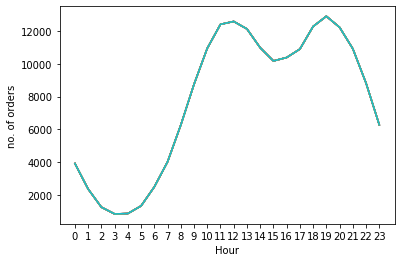

In [73]:
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('no. of orders')
plt.show()

### what products most often sold together?

In [74]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

C:\Users\ANILKU~1\AppData\Local\Temp/ipykernel_2284/3086918463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Order ID                     Product  Quantity Ordered  Price Each  \
2    176560                Google Phone               1.0      600.00   
3    176560            Wired Headphones               1.0       11.99   
17   176574                Google Phone               1.0      600.00   
18   176574        USB-C Charging Cable               1.0       11.95   
29   176585  Bose SoundSport Headphones               1.0       99.99   

            Order Date                      Purchase Address  Month   Sales  \
2  2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
3  2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
17 2019-04-03 19:42:00     20 Hill St, Los Angeles, CA 90001      4  600.00   
18 2019-04-03 19:42:00     20 Hill St, Los Angeles, CA 90001      4   11.95   
29 2019-04-07 11:31:00     823 Highland St, Boston, MA 02215      4   99.99   

                 City  Hour  Minute  \
2    Los Angeles (CA)    14      38   
3    Los Angeles (CA)    14      38   
17   Los Angeles (CA)    19      42   
18   Los Angeles (CA)    19      42   
29        Boston (MA)    11      31   

                                              Grouped  
2                       Google Phone,Wired Headphones  
3                       Google Phone,Wired Headphones  
17                  Google Phone,USB-C Charging Cable  
18                  Google Phone,USB-C Charging Cable  
29  Bose SoundSport Headphones,Bose SoundSport Hea...

In [75]:
## remove duplicates groups 

df = df[['Order ID', 'Grouped']].drop_duplicates()
df

Order ID                                            Grouped
2        176560                      Google Phone,Wired Headphones
17       176574                  Google Phone,USB-C Charging Cable
29       176585  Bose SoundSport Headphones,Bose SoundSport Hea...
31       176586                AAA Batteries (4-pack),Google Phone
118      176672      Lightning Charging Cable,USB-C Charging Cable
...         ...                                                ...
186237   259296  Apple Airpods Headphones,Apple Airpods Headphones
186239   259297  iPhone,Lightning Charging Cable,Lightning Char...
186247   259303       34in Ultrawide Monitor,AA Batteries (4-pack)
186259   259314            Wired Headphones,AAA Batteries (4-pack)
186296   259350                  Google Phone,USB-C Charging Cable

[7136 rows x 2 columns]

In [76]:
from itertools import combinations
from collections import Counter 

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 4)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', '34in Ultrawide Monitor') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'Apple Airpods Headphones') 1
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Google Phone') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'Google Phone') 1
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1


### what product sold the most? why do you think it sold the most?

In [80]:
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
1   176559  Bose SoundSport Headphones               1.0       99.99   
2   176560                Google Phone               1.0      600.00   
3   176560            Wired Headphones               1.0       11.99   
4   176561            Wired Headphones               1.0       11.99   

           Order Date                      Purchase Address  Month   Sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
1 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
2 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
4 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

                City  Hour  Minute  
0        Dallas (TX)     8      46  
1        Boston (MA)    22      30  
2   Los Angeles (CA)    14      38  
3   Los Angeles (CA)    14      38  
4   Los Angeles (CA)     9      27

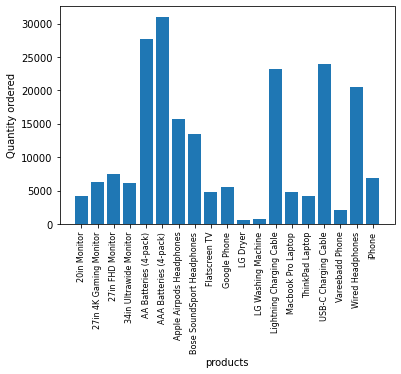

In [87]:
product_group = all_data.groupby('Product')

Quantity_ordered = product_group.sum()['Quantity Ordered']


products = [product for product, df in product_group]

plt.bar(products, Quantity_ordered)
plt.ylabel('Quantity ordered')
plt.xlabel('products')

plt.xticks(products, rotation='vertical',size=8)

plt.show()

C:\Users\ANILKU~1\AppData\Local\Temp/ipykernel_2284/3393338034.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


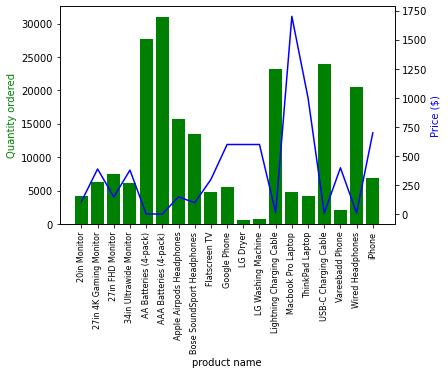

In [94]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, Quantity_ordered, color='g')
ax2.plot(products, prices, "b-")

ax1.set_xlabel('product name')
ax1.set_ylabel('Quantity ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()